# Proyecto: Procesamiento de Datos con Python
**Equipo 11**

- Ana Cristina Castillo Escobar
- Edgar Balderas Loranca
- José Alberto Cortes Ayala
- Leandro Marcelo Pantoja Acosta
- Luis Arturo Rosas León
- Marcos Yáñez Espíndola
---


## **Identificación del problema**

De acuerdo a la Organización Panamericana de la Salud (OPS) las enfermedades cardiovasculares son la principal causa de muerte a nivel mundial, se tiene estimado que alrededor de 1.9 millones de personas mueren por causa de algún padecimiento cardíaco (OPS, 2020). Además, las cardiopatías, los accidentes cerebrovasculares y otras enfermedades no transmisibles también se han posicionado como la mayores causantes de discapacidades, se calcula que estas afecciones en conjunto han hecho perder a la población mundial más de 100 millones de años de vida saludable (OPS, 2020)

El número elevado de muertes y de discapacidades causadas por estos problemas de salud es muy alarmante, más aún cuando se considera que la mayor parte de estas enfermedades cardiovasculares se pueden prevenir con una dieta saludable, ejercicio físico regular, uso nulo o moderado de alcohol o tabaco, entre otras (OPS, 2020).

Existen factores de riesgo que aumentan las probabilidades de ser víctima de una enfermedad cardiovascular. Analizar la relación entre los factores de riesgo y las muertes causadas por estos padecimientos podría ayudar a crear modelos de predicción que puedan identificar personas que deban tomar medidas de prevención para cuidar su vida y su salud.

**Referencias**

OPS.(2020). La OMS revela las principales causas de muerte y discapacidad en el mundo: 2000-2019. 18/09/2021. https://www.paho.org/es/noticias/9-12-2020-oms-revela-principales-causas-muerte-discapacidad-mundo-2000-2019 

OPS.(2020). Día Mundial del Corazón: Enfermedades cardiovasculares causan 1,9 millones de muertes al año en las Américas.18/09/2021. https://www3.paho.org/hq/index.php?option=com_content&view=article&id=7257:2012-dia-mundial-corazon-enfermedades-cardiovasculares-causan-1-9-millones-muertes-ano-americas&Itemid=4327&lang=fr

---



## **Planteamiento de preguntas**

Preguntas de investigación relacionadas con las enfermedades cardiovasculares.

1. ¿La edad y el sexo se consideran factores de riesgo considerable?
2. ¿Cuál es el factor de riesgo con mayor correlación con la muerte?
3. ¿Cuál es la combinación de factores de riesgo más mortal?

---

## **Recolección de datos**

Para este proyecto se utilizó una base de datos disponible en la página web Kaggle. El dataset se compone de datos selectos de los historiales clínicos de pacientes que murieron o sobrevivieron a afecciones cardíacas. La muestra se compone de 105 mujeres y 194 hombres de entre 40 y 95 años de edad.

El dataset cuenta con 13 columnas:
1. Edad (age).
2. Anemia (anaemia).
    - 1 = Verdadero.
    - 0 = Falso.
3. Creatina fosfoquinasa (creatinine_phosphokinase): nivel de esta enzima en la sangre (mcg/L).
4. Diabetes (diabetes).
      - 1 = Verdadero.
      - 0 = Falso.
5. Fracción de eyección (ejection_fraction): porcentaje de sangre que sale del corazón con cada contracción.
6. Presión sanguínea alta (high_blood_pressure).
      - 1 = Verdadero.
      - 0 = Falso.
7. Plaquetas (platelets): plaquetas en sangre (kiloplatelets/mL).
8. Suero de creatinina (serum_creatinine): nivel de suero de creatinina en sangre (mg/dL).
9. Sodio sérico (serum_sodium): nivel de sodio sérico en sangre (mEq/L).
10. Sexo binario (sex).
      - 1 = Hombre.
      - 0 = Mujer.
11. Fumar (smoking).
      - 1 = Verdadero.
      - 0 = Falso.
12. Periodo de seguimiento (time): periodo de seguimiento del paciente en días.
13. Evento de muerte (DEATH_EVENT): si el paciente murió durante el periodo de seguimiento.
      - 1 = Verdadero.
      - 0 = Falso

**Links para la descarga de los datos**

Heart Failure Prediction: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

---



In [ ]:
# Se importan las bibliotecas necesarias para realizar el proyecto
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Se monta el Drive que contiene las bases de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se carga la base de datos
datosCorazon= pd.read_csv('/content/drive/MyDrive/Bedu Equipo 18/Análisis Exploratorio de Datos con Python /heart_failure_clinical_records_dataset.csv')
datosCorazon.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Se obtiene información de los datos contenidos en las columnas de la base de datos
datosCorazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Se verifica que la base de datos no contenga ningún NaN
datosCorazon.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Se obtiene la media, la desviación estándar y los percentiles de cada una de las columnas
descripcion = datosCorazon.describe(percentiles=np.linspace(0,1,11))
# Se remueven las columnas con datos categóricos binários
descripcion.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'], inplace=True)
descripcion

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
0%,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
10%,45.000000,67.600000,25.000000,153000.000000,0.80000,132.000000,26.800000
20%,50.000000,100.200000,30.000000,196000.000000,0.90000,134.000000,59.600000
30%,53.000000,130.400000,30.000000,221000.000000,1.00000,135.000000,79.400000
40%,58.000000,176.800000,35.000000,237000.000000,1.00000,136.000000,95.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000


In [ ]:
# Se creó una paleta de colores personalizada para las gráficas del trabajo
colores = ["#7d1128","#ff2c55","#41ead4","#8acdea","#ff9f1c","#82ff9e","#677db7","#136f63","#f9e784","#011627"]
customPalette = sns.color_palette(colores)
customPalette

[(0.49019607843137253, 0.06666666666666667, 0.1568627450980392),
 (1.0, 0.17254901960784313, 0.3333333333333333),
 (0.2549019607843137, 0.9176470588235294, 0.8313725490196079),
 (0.5411764705882353, 0.803921568627451, 0.9176470588235294),
 (1.0, 0.6235294117647059, 0.10980392156862745),
 (0.5098039215686274, 1.0, 0.6196078431372549),
 (0.403921568627451, 0.49019607843137253, 0.7176470588235294),
 (0.07450980392156863, 0.43529411764705883, 0.38823529411764707),
 (0.9764705882352941, 0.9058823529411765, 0.5176470588235295),
 (0.00392156862745098, 0.08627450980392157, 0.15294117647058825)]

Primero se crearon box plots para cada una de las variables con datos estructurados numéricos continuos.

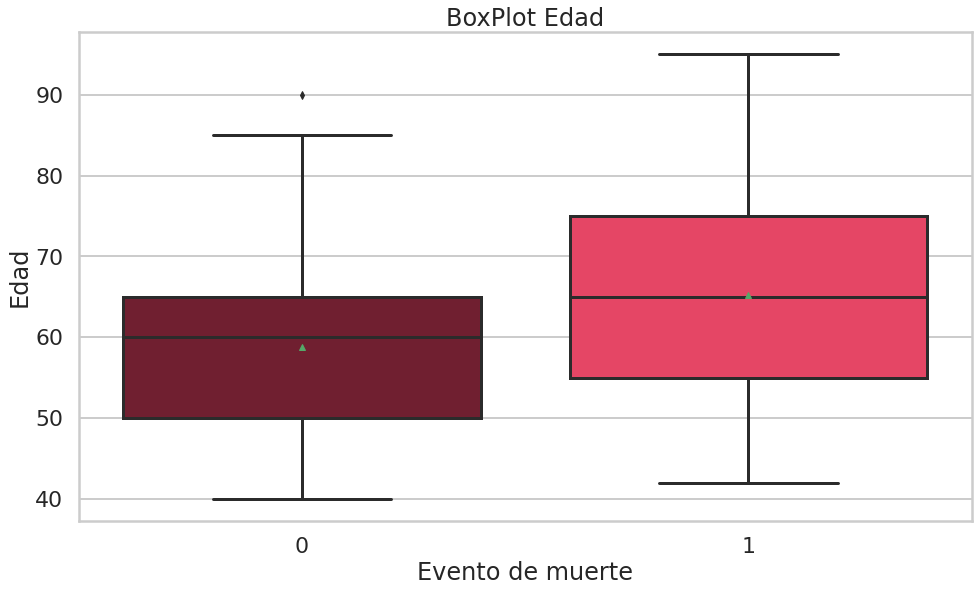

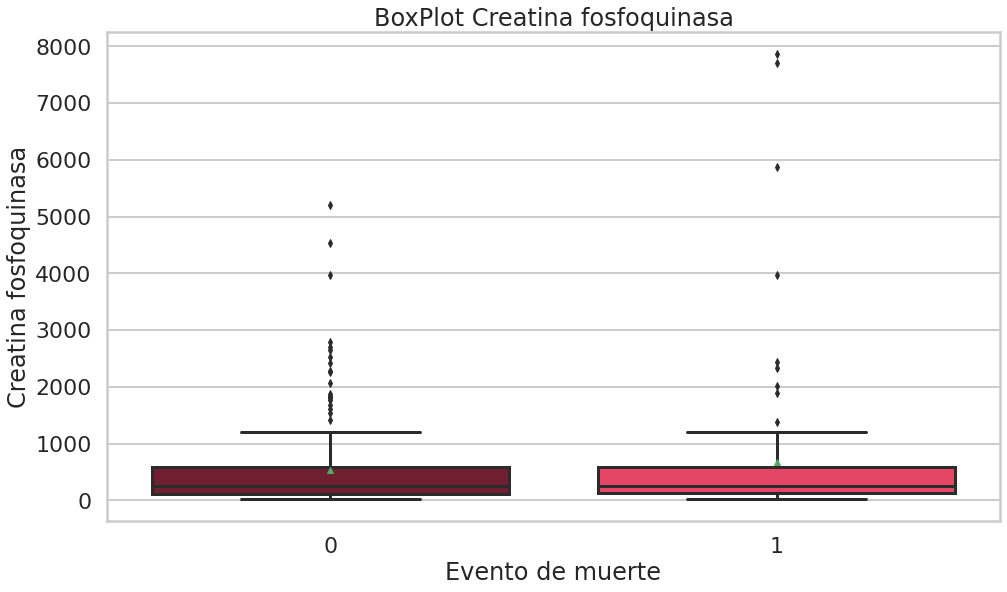

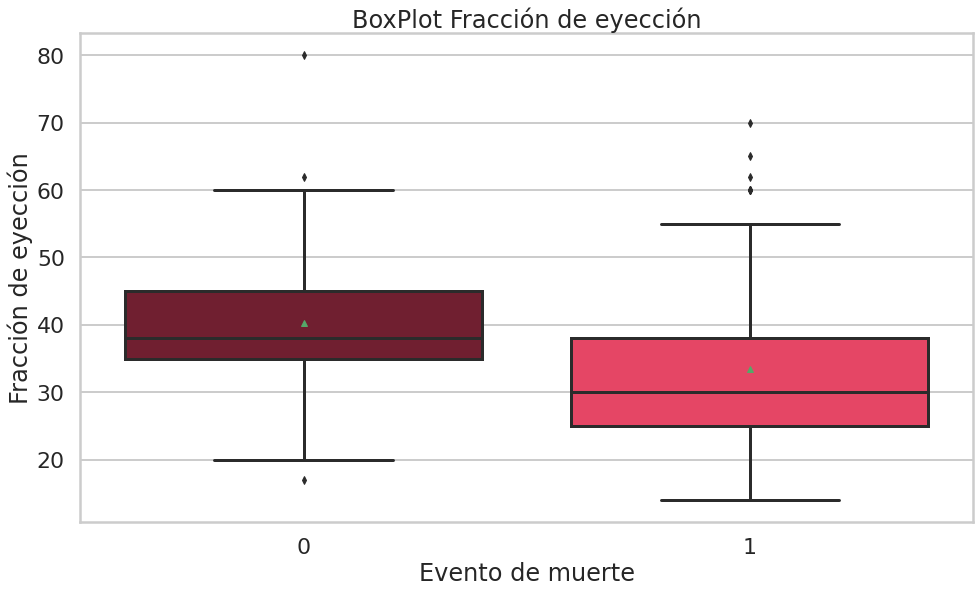

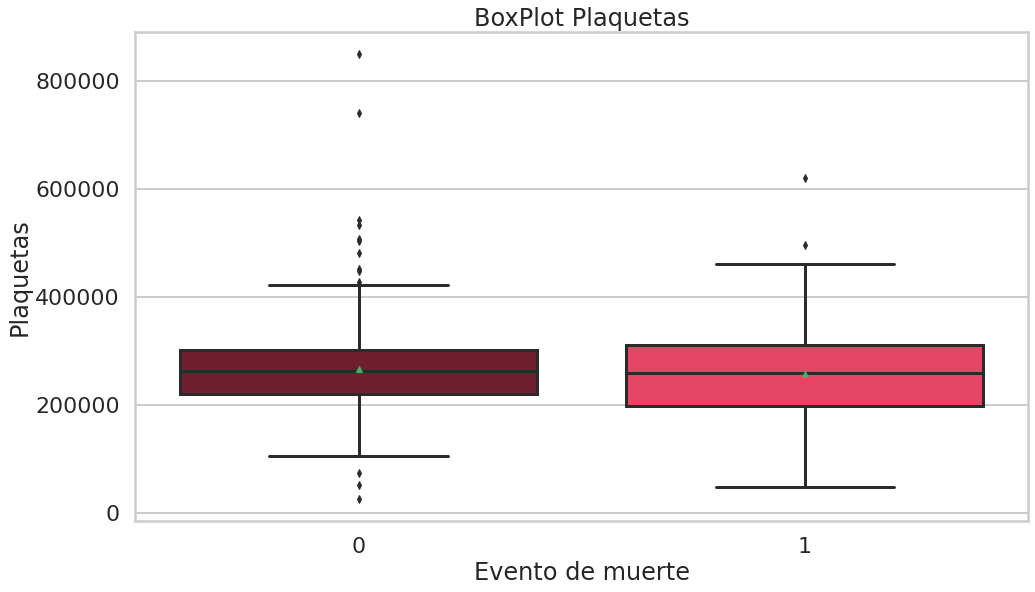

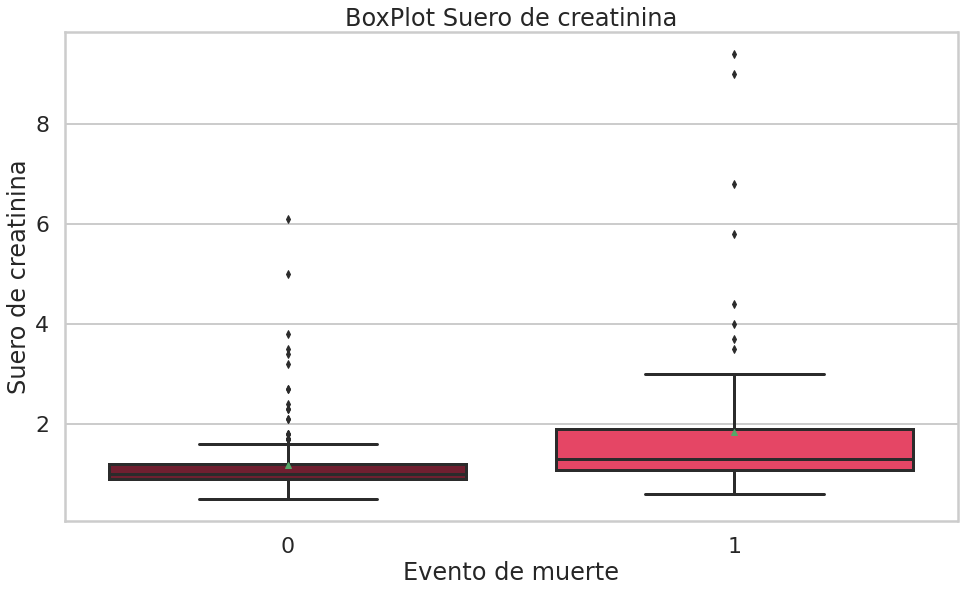

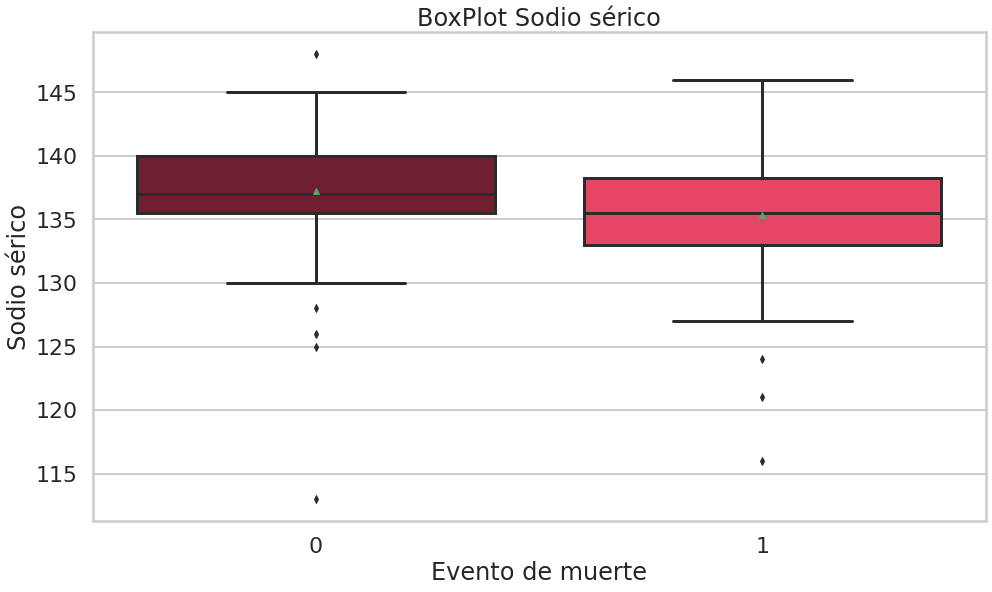

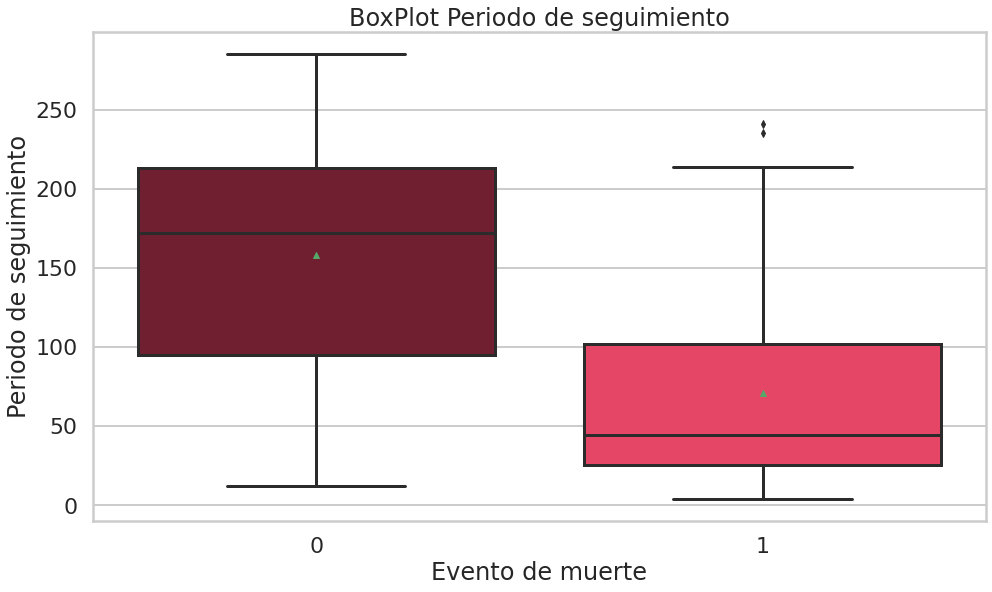

In [ ]:
sns.set(context ='poster', style="whitegrid")
nombres = ['Edad','Creatina fosfoquinasa', 'Fracción de eyección', 'Plaquetas', 'Suero de creatinina', 'Sodio sérico', 'Periodo de seguimiento']
columnas = ['age',	'creatinine_phosphokinase',	'ejection_fraction',	'platelets',	'serum_creatinine',	'serum_sodium',	'time']
for i in range(len(columnas)):
  plt.figure(figsize = (16,9))
  sns.boxplot(y = columnas[i], x="DEATH_EVENT", data=datosCorazon, showmeans= True, palette=customPalette).set_title("BoxPlot " + nombres[i])
  plt.xlabel("Evento de muerte")
  plt.ylabel(nombres[i])

Se decidió no eliminar o sustituir los datos atípicos ya que no consideramos correcto reducir el tamaño de la muestra; además de que algunos datos, como la creatina fosfoquinasa y el número de plaquetas, son indicadores de la salud del paciente, por lo que remover los valores atípicos causaría un sesgo al no considerar a los sujetos con potenciales probelmas de salud.

Como el dataset contiene personas que han muerto y las que no, se procede a hacer un subdataset con solo las personas que han muerto.

In [ ]:
muertos = datosCorazon[datosCorazon["DEATH_EVENT"] ==1]
# Se calcula la edad promedio de las personas que han muerto
muertos["age"].mean()

65.21528125

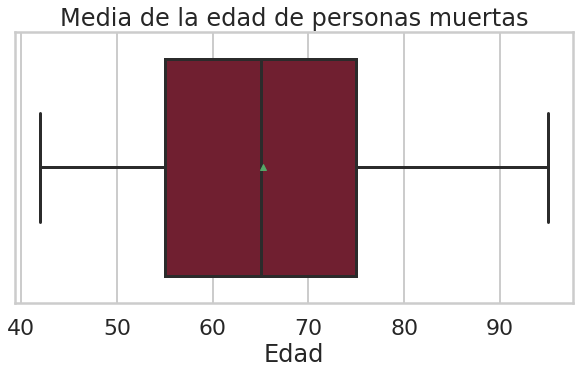

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (10,5))
ax = sns.boxplot(x=muertos['age'], showmeans= True, palette=customPalette).set_title("Media de la edad de personas muertas")
plt.xlabel("Edad");

De esta gráfica se puede observar que la media de la edad de personas muertas se encuentra entre 60 y 70 años.

###**¿La edad y el género tienen algo que ver con la causa de muerte por una enfermedad cardiovascular?**

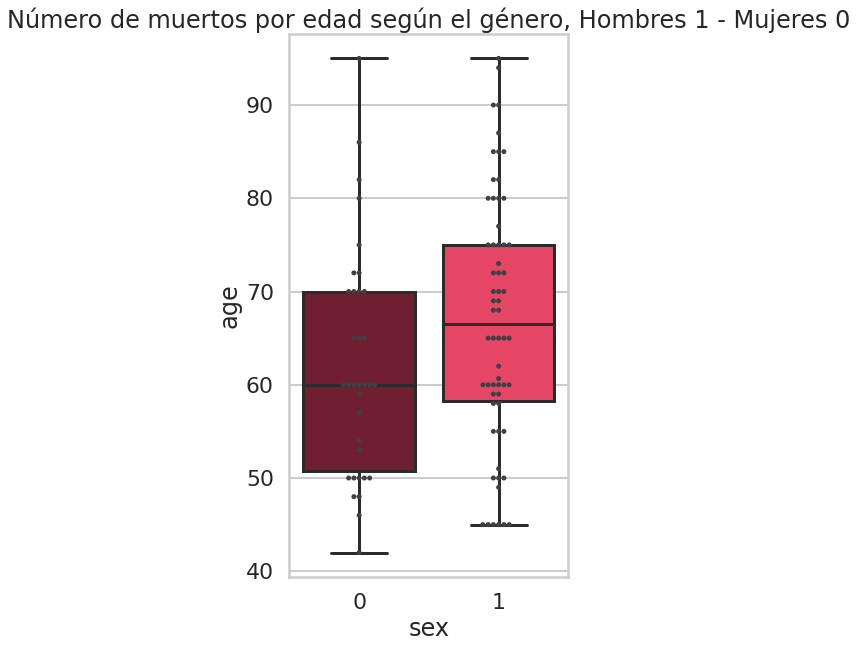

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (5,10))
ax = sns.boxplot(x="sex", y="age", data=muertos, palette=customPalette)
sns.swarmplot(x="sex", y="age", data=muertos, color=".25").set_title("Número de muertos por edad según el género, Hombres 1 - Mujeres 0");

De esta gráfica se puede observar que la mayoría de las mujeres con problemas cardíacos se mueren a la edad de 60 años, mientras que la mayoría de los hombres con estas mismas afectaciones tiene 65 años.

###**¿Cuántos hombres y mujeres de nuestro dataset están vivos o muertos?**

In [ ]:
hombres = datosCorazon[datosCorazon["sex"]==1]
mujeres = datosCorazon[datosCorazon["sex"]==0]

In [ ]:
hombres_vivos = len(hombres[hombres["DEATH_EVENT"] == 0])
hombres_muertos = len(hombres[hombres["DEATH_EVENT"] == 1])
mujeres_vivas = len(mujeres[mujeres["DEATH_EVENT"] == 0])
mujeres_muertas = len(mujeres[mujeres["DEATH_EVENT"] == 1])

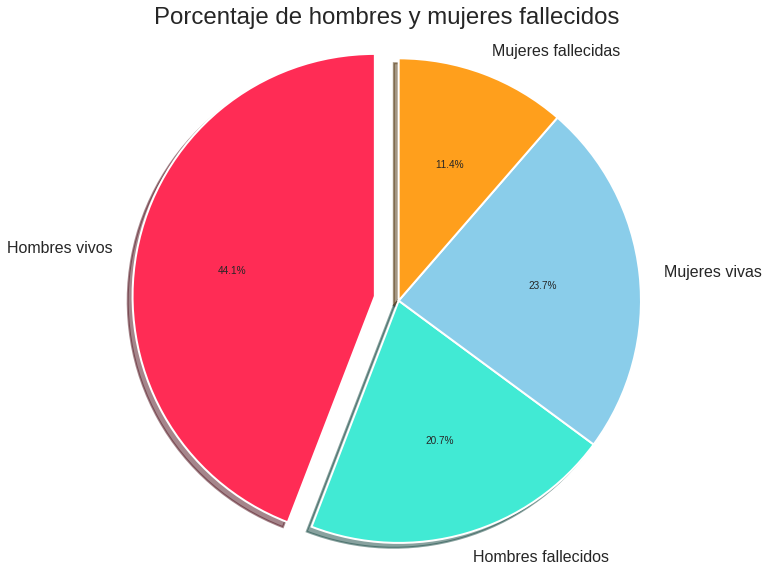

In [ ]:
labels = 'Hombres vivos', 'Hombres fallecidos', 'Mujeres vivas', 'Mujeres fallecidas'
sizes = [hombres_vivos/299*100,hombres_muertos/299*100, mujeres_vivas/299*100, mujeres_muertas/299*100]
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colores[1:])
ax1.axis('equal')
plt.title("Porcentaje de hombres y mujeres fallecidos")
plt.show()

In [ ]:
crosstab = pd.crosstab(datosCorazon['DEATH_EVENT'],[datosCorazon['sex']])
crosstab.stack(0)

DEATH_EVENT  sex
0            0       71
             1      132
1            0       34
             1       62
dtype: int64

Es importante recordar que la mayor parte de la muestra es de hombres.

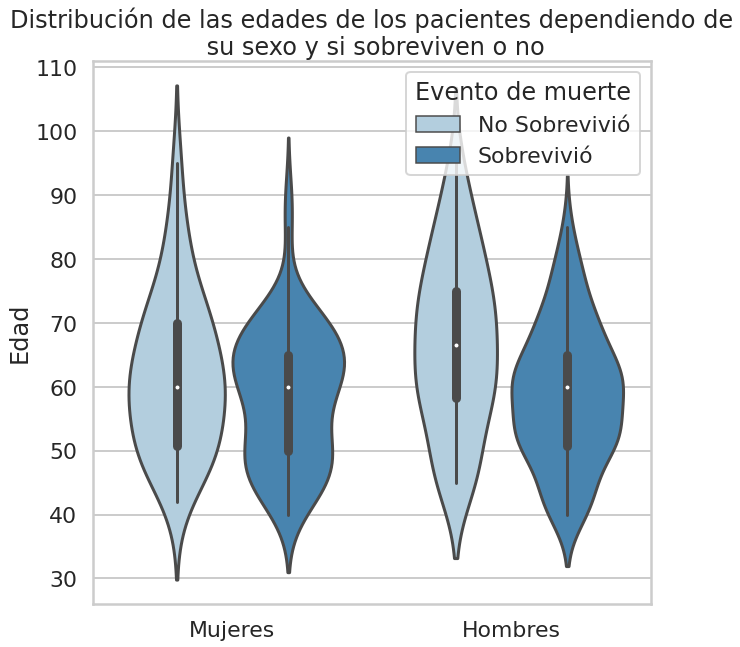

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (10,10))
ax = sns.violinplot(x="sex", y="age",hue=datosCorazon['DEATH_EVENT'].replace({0:'Sobrevivió', 1:'No Sobrevivió'}),
                    data=datosCorazon, palette="Blues")
ax.set_xticklabels(['Mujeres', 'Hombres'])
ax.legend(title="Evento de muerte")
plt.xlabel("")
plt.ylabel("Edad")
ax.set_title("Distribución de las edades de los pacientes dependiendo de\n su sexo y si sobreviven o no");

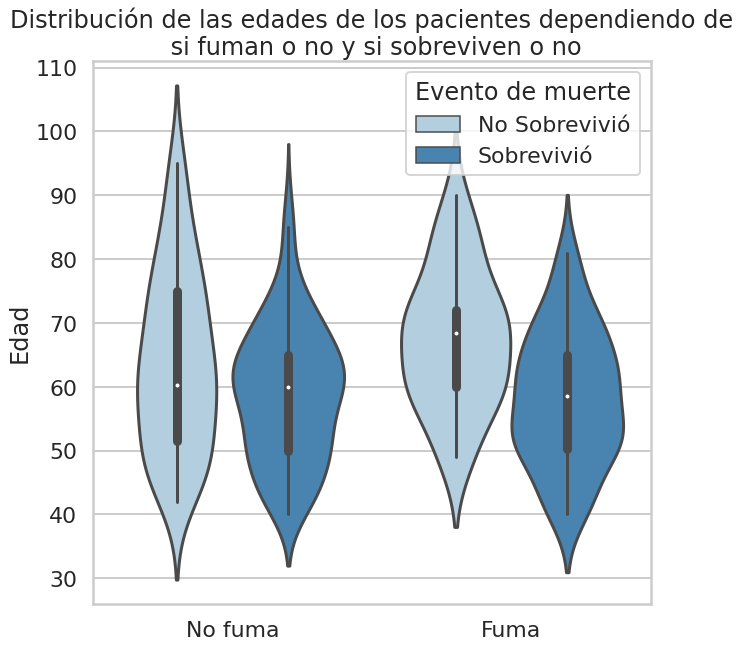

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (10,10))
ax = sns.violinplot(x="smoking", y="age",hue=datosCorazon['DEATH_EVENT'].replace({0:'Sobrevivió', 1:'No Sobrevivió'}),
                    data=datosCorazon, palette="Blues")
ax.set_xticklabels(['No fuma', 'Fuma'])
ax.legend(title="Evento de muerte")
plt.xlabel("")
plt.ylabel("Edad")
ax.set_title("Distribución de las edades de los pacientes dependiendo de\n si fuman o no y si sobreviven o no");

En esta gráfica se puede observar que las personas con mayor supervivencia son las que no fuman, llegan a edades de 55 a 65 años, mientras que las personas que fuman solo llegan a un rango de edad de 50 a 60 años.

El evento de muerte para la persona que fuma es más alto que para la persona que no fuma.


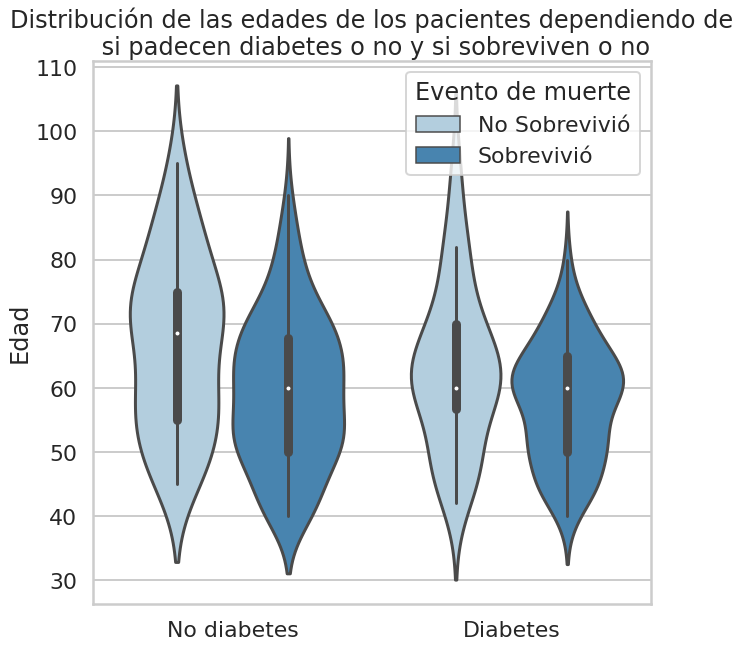

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (10,10))
ax = sns.violinplot(x="diabetes", y="age", hue=datosCorazon['DEATH_EVENT'].replace({0:'Sobrevivió', 1:'No Sobrevivió'}),
                    data=datosCorazon, palette="Blues")
ax.set_title("Distribución de las edades de los pacientes dependiendo de\n si padecen diabetes o no y si sobreviven o no")
ax.set_xticklabels(['No diabetes', 'Diabetes'])
ax.legend(title="Evento de muerte")
plt.xlabel("")
plt.ylabel("Edad");


## **¿Qué otros factores se relacionan con la muerte por una enfermedad cardiovascular?**

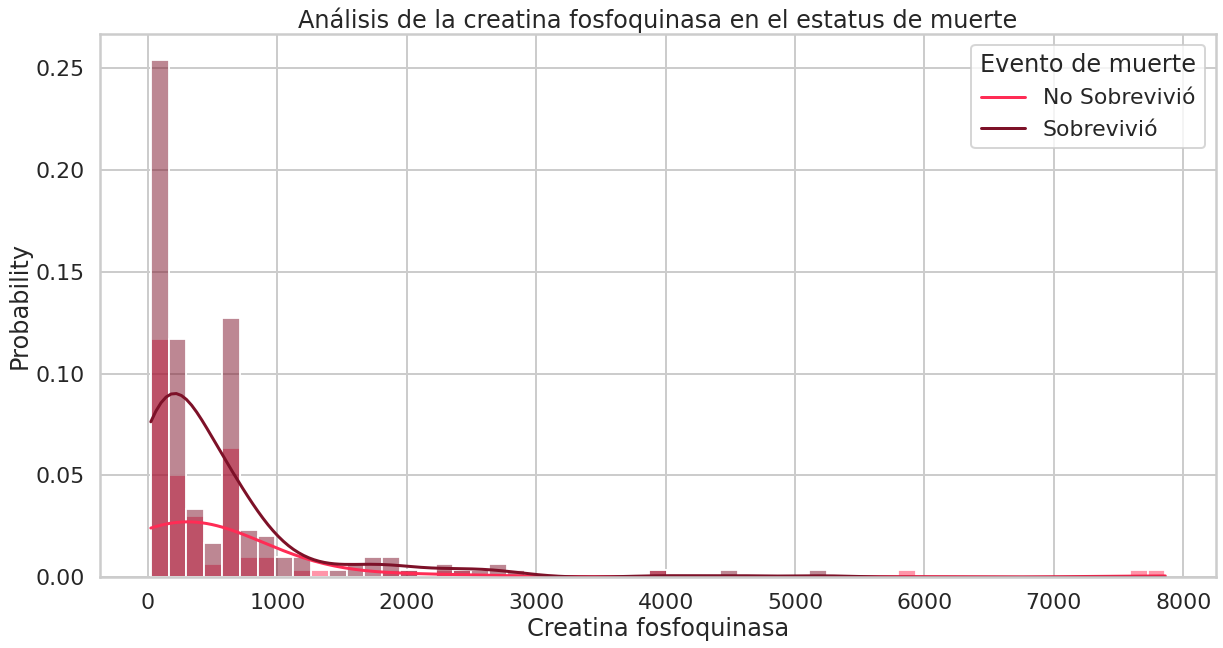

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(data=datosCorazon, x="creatinine_phosphokinase", hue='DEATH_EVENT', palette=sns.color_palette(colores,2), stat = "probability", kde=True)
ax.set(title = "Análisis de la creatina fosfoquinasa en el estatus de muerte")
plt.xlabel("Creatina fosfoquinasa")
plt.legend(title='Evento de muerte', labels=['No Sobrevivió', 'Sobrevivió']);

En esta gráfica se puede observar que la mayoría de los pacientes vivos tienen bajos niveles de creatinina fosfoquinasa. Sin embargo, para los que mueren también sucede lo mismo, por lo que no se puede deducir aún si están correlacionadas.

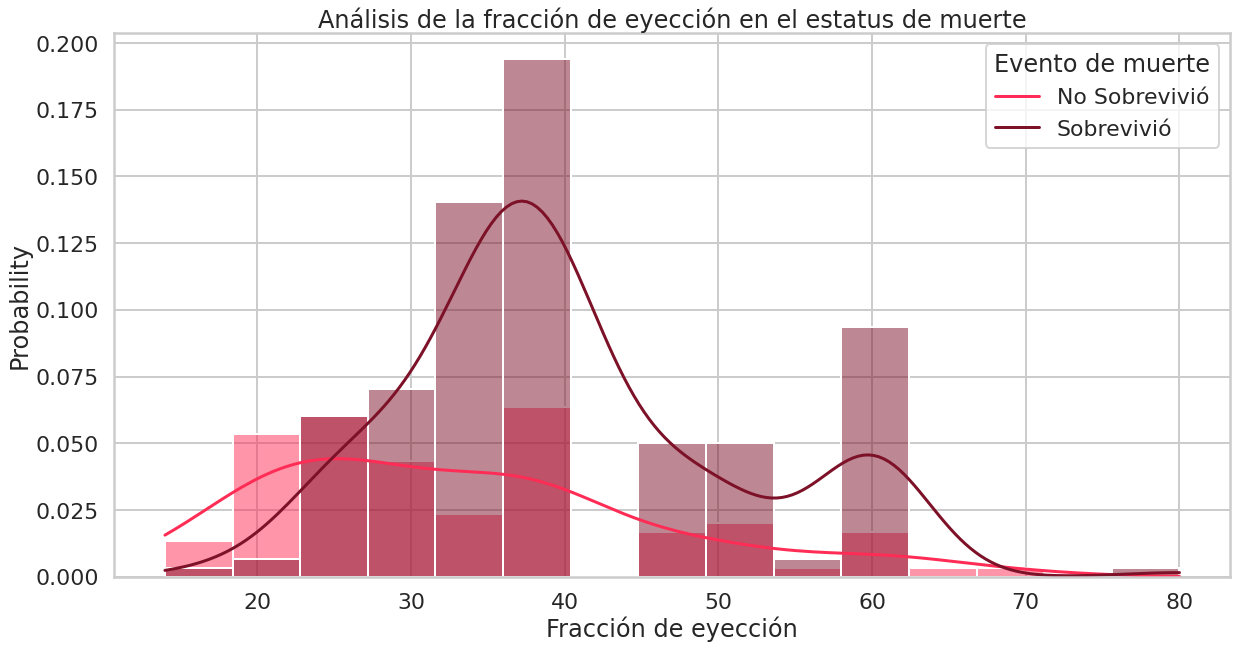

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(data=datosCorazon, x="ejection_fraction", hue="DEATH_EVENT", palette=sns.color_palette(colores,2), stat = "probability", kde=True)
ax.set(title = "Análisis de la fracción de eyección en el estatus de muerte")
plt.xlabel("Fracción de eyección")
plt.legend(title='Evento de muerte', labels=['No Sobrevivió', 'Sobrevivió']);

En esta gráfica se puede observar que la mayoría de los pacientes vivos tienen un nivel de fracción de eyección de 40. Mientras que los muertos tienen aproximadamente 30.

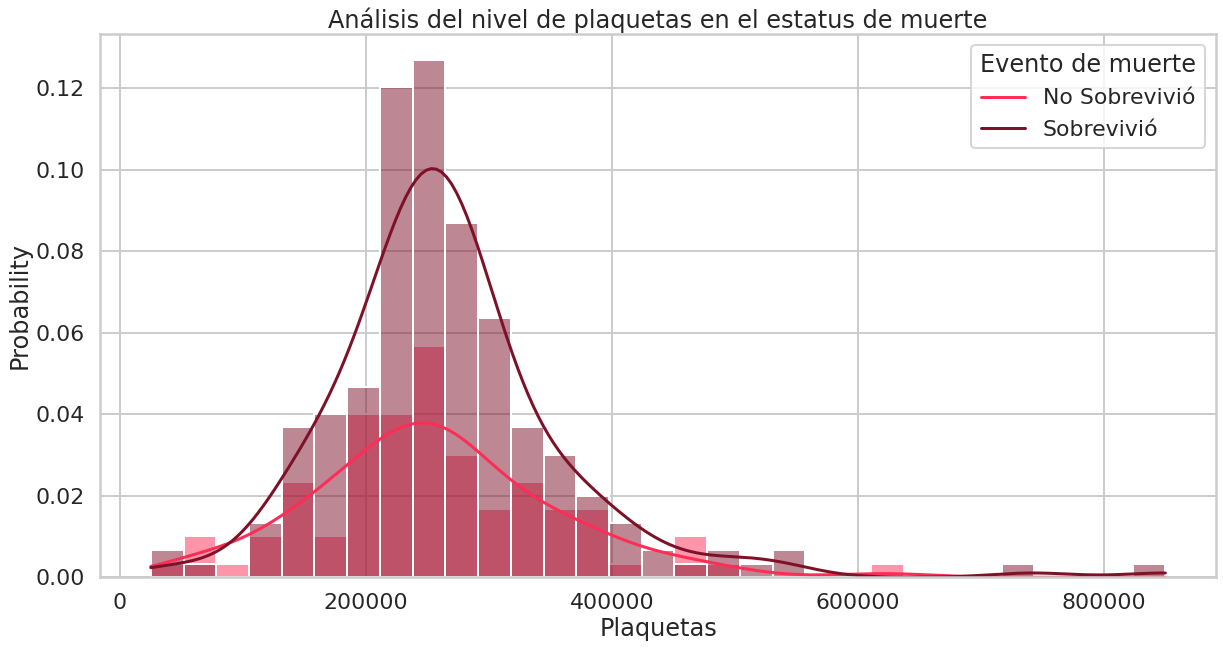

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(data=datosCorazon, x="platelets", hue="DEATH_EVENT", palette=sns.color_palette(colores,2), stat = "probability", kde=True)
ax.set(title = "Análisis del nivel de plaquetas en el estatus de muerte")
plt.xlabel("Plaquetas")
plt.legend(title='Evento de muerte', labels=['No Sobrevivió', 'Sobrevivió']);

De esta gráfica se puede observar que la mayoría del número de plaquetas de las personas vivas es alto, mientras que para las personas muertas

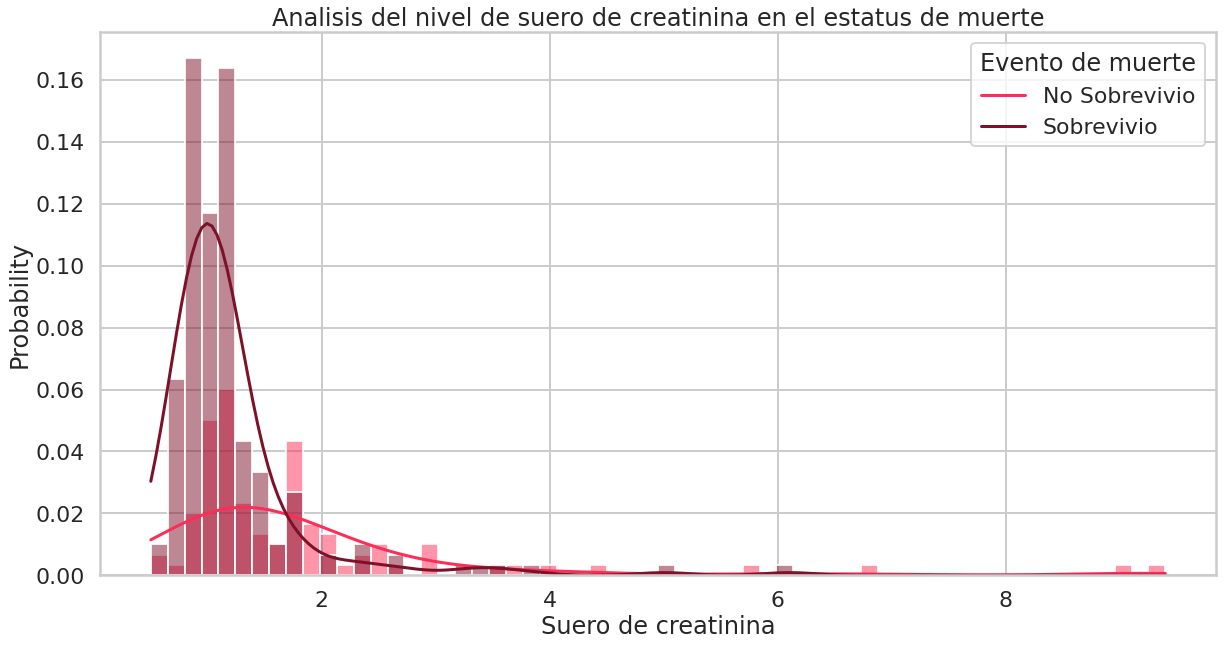

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(data=datosCorazon, x="serum_creatinine", hue="DEATH_EVENT", palette=sns.color_palette(colores,2), stat = "probability", kde=True)
ax.set(title = "Analisis del nivel de suero de creatinina en el estatus de muerte")
plt.xlabel("Suero de creatinina")
plt.legend(title='Evento de muerte', labels=['No Sobrevivio', 'Sobrevivio']);

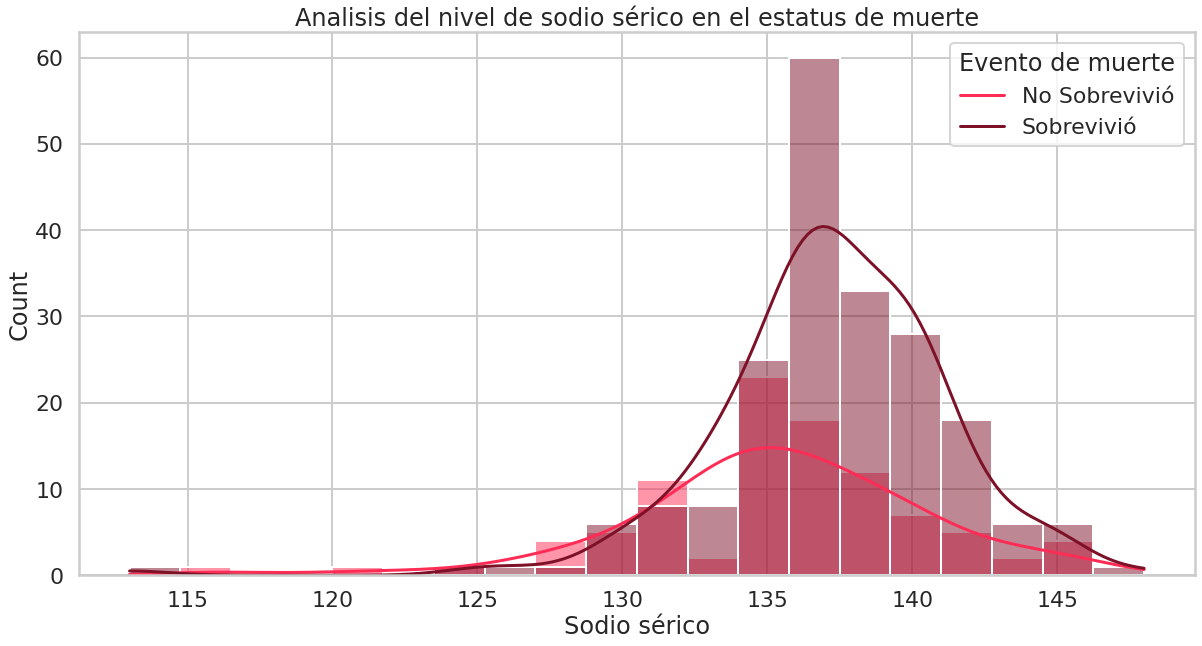

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(data=datosCorazon, x="serum_sodium", hue="DEATH_EVENT", kde =True, palette=sns.color_palette(colores,2))
ax.set(title = "Analisis del nivel de sodio sérico en el estatus de muerte")
plt.xlabel("Sodio sérico")
plt.legend(title='Evento de muerte', labels=['No Sobrevivió', 'Sobrevivió']);

In [ ]:
datosCorazon.corr(method='pearson')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## **¿Cuál es el factor de riesgo con mayor correlación con la muerte?**

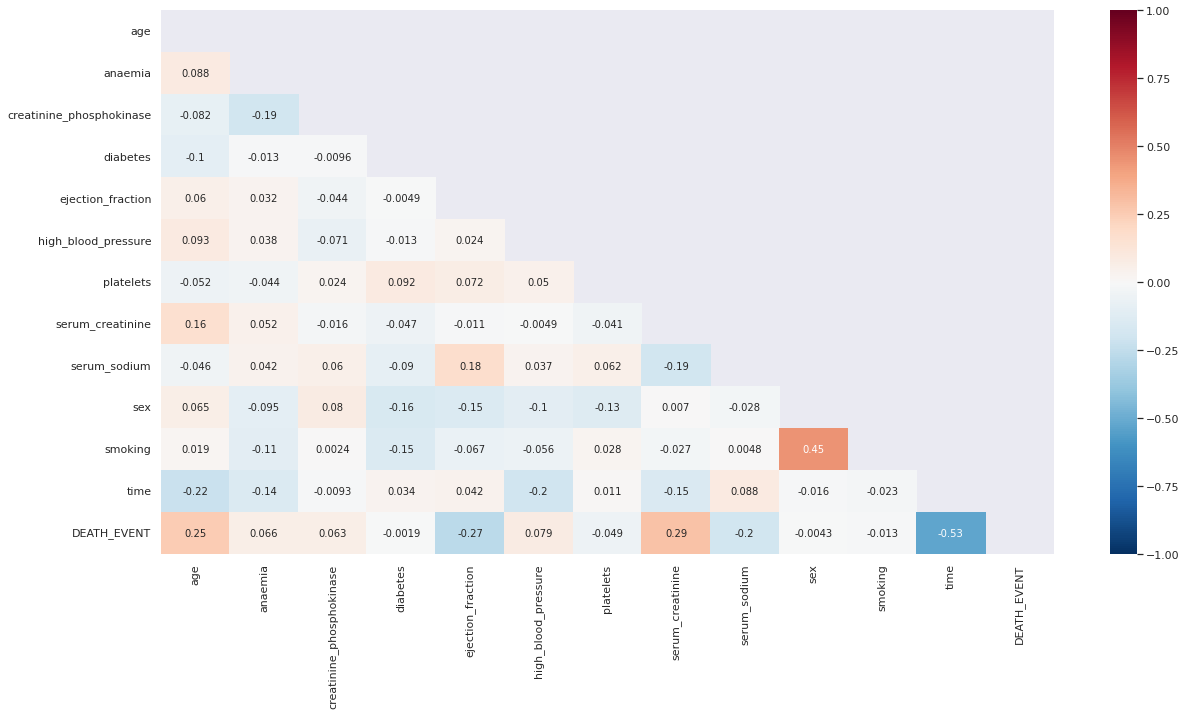

In [ ]:
corr = datosCorazon.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(context ='poster', style="whitegrid")
sns.set(font_scale=1)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True,annot_kws={"size": 10}, cmap='RdBu_r', vmin=-1,vmax=1, mask=mask);

De este mapa de calor se puede ver que hay 4 características que aportan para "decir" si una persona muere o no, entre ellas: la edad, la fracción de eyección, los niveles de sodio y creatinina y el tiempo que llevaron el seguimiento.

In [ ]:
columnas_signifivcativas = datosCorazon[["age","ejection_fraction","serum_creatinine","serum_sodium","time","DEATH_EVENT"]]
columnas_signifivcativas.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1


Para encontrar un relación lineal entre un par de variables, se procede a hacer un pairplot.

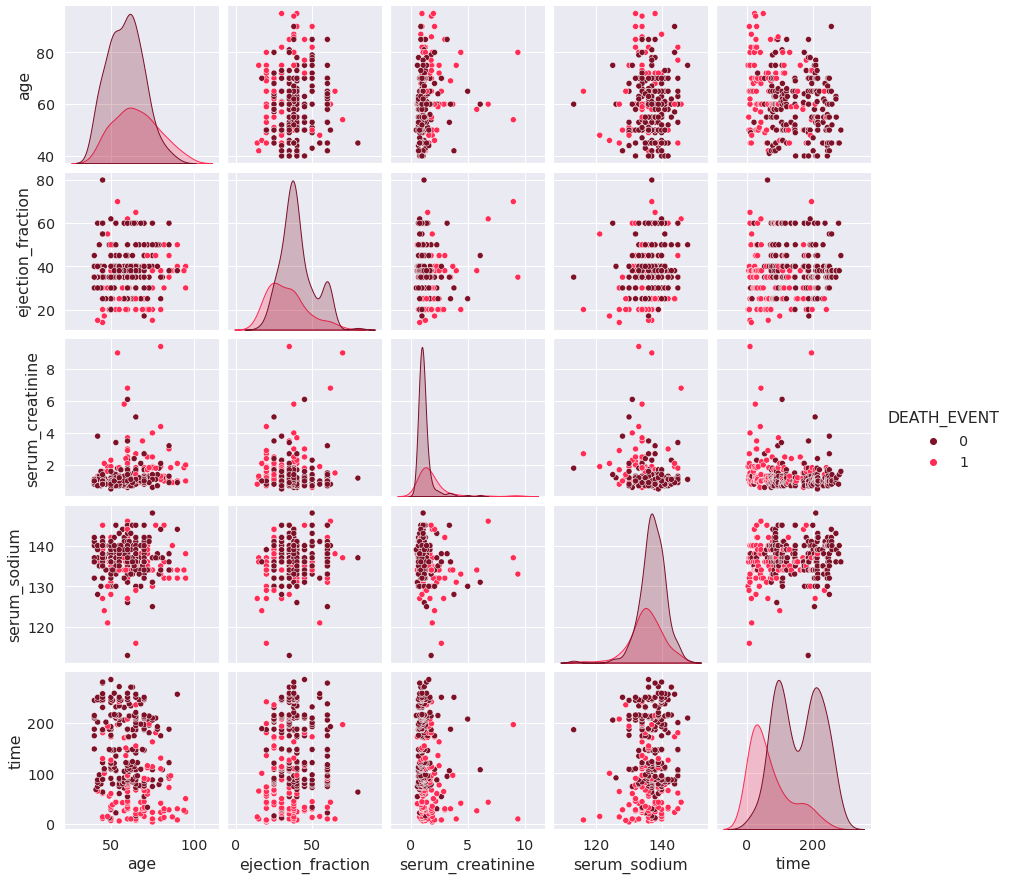

In [ ]:
sns.set(font_scale=1.3)
sns.pairplot(columnas_signifivcativas, hue= 'DEATH_EVENT', palette=sns.color_palette(colores,2));

## Bootstraping

Se realiza el *Bootstraping* para las variables suero de creatinina, fracción de eyección, sodio sérico y la edad. Se excluyó el tiempo de seguimiento ya que es obvio que los pacientes que sobrevivieron fueron monitoreados por más tiempo.

#### Suero de creatinina

In [ ]:
medias = []

for i in range(1000):
  muestras = datosCorazon['serum_creatinine'].sample(n=100, replace=True)
  medias.append(muestras.mean())
medias_series = pd.Series(medias)

In [ ]:
print(f"Error estándar: {medias_series.std()}")
print(f"Valor mínimo: {medias_series.min()}")
print(f"Valor máximo: {medias_series.max()}")
print(f"Rango: {medias_series.max()-medias_series.min()}")
print(f"Curtosis: {medias_series.kurtosis()}")
print(f"Sesgo: {medias_series.skew()}")
li = medias_series.quantile(0.025)
ls = medias_series.quantile(0.975)
print(f"Intervalo de confianza al 95%: {li}<{medias_series.mean()}<{ls}")

Error estándar: 0.10276861360835317
Valor mínimo: 1.1622999999999999
Valor máximo: 1.7288
Rango: 0.5665
Curtosis: -0.23914660732749882
Sesgo: 0.31674899550394087
Intervalo de confianza al 95%: 1.2140650000000006<1.3924136000000018<1.6012000000000004


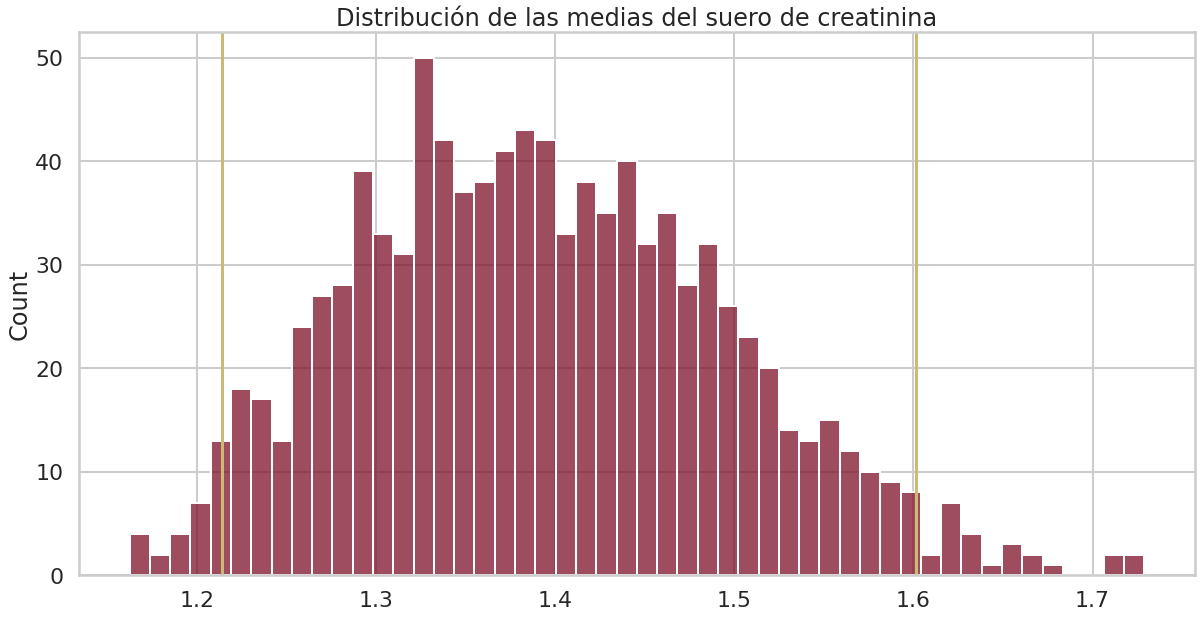

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(medias_series, color=colores[0], bins=50)
ax.set_title("Distribución de las medias del suero de creatinina")
plt.axvline(li,c="y")
plt.axvline(ls,c="y");

#### Fracción de eyección

In [ ]:
medias =[]

for i in range(1000):
  muestras = datosCorazon['ejection_fraction'].sample(n=100, replace=True)
  medias.append(muestras.mean())
medias_series = pd.Series(medias)

In [ ]:
print(f"Error estándar: {medias_series.std()}")
print(f"Valor mínimo: {medias_series.min()}")
print(f"Valor máximo: {medias_series.max()}")
print(f"Rango: {medias_series.max()-medias_series.min()}")
print(f"Curtosis: {medias_series.kurtosis()}")
print(f"Sesgo: {medias_series.skew()}")
li = medias_series.quantile(0.025)
ls = medias_series.quantile(0.975)
print(f"Intervalo de confianza al 95%: {li}<{medias_series.mean()}<{ls}")

Error estándar: 1.1861898319482493
Valor mínimo: 34.4
Valor máximo: 42.32
Rango: 7.920000000000002
Curtosis: -0.14769852187989185
Sesgo: 0.0924771962077739
Intervalo de confianza al 95%: 35.859<38.062330000000024<40.43125


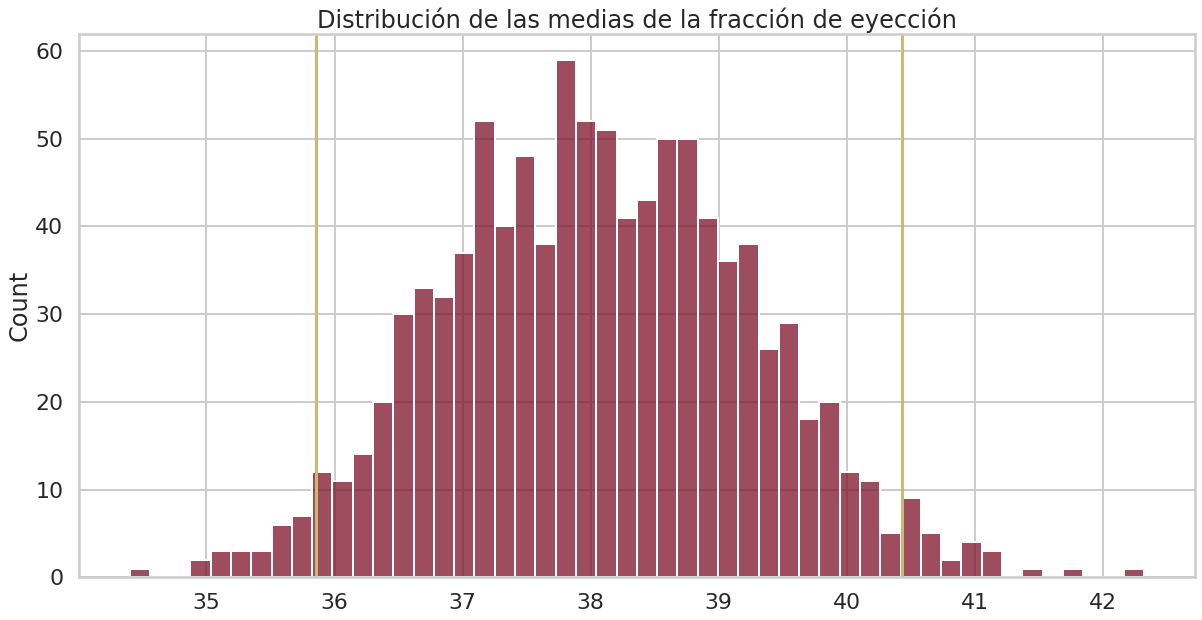

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(medias_series, color=colores[0], bins=50)
ax.set_title("Distribución de las medias de la fracción de eyección")
plt.axvline(li,c="y")
plt.axvline(ls,c="y")

#### Sodio sérico

In [ ]:
medias =[]

for i in range(1000):
  muestras = datosCorazon['serum_sodium'].sample(n=100, replace=True)
  medias.append(muestras.mean())
medias_series = pd.Series(medias)

In [ ]:
print(f"Error estándar: {medias_series.std()}")
print(f"Valor mínimo: {medias_series.min()}")
print(f"Valor máximo: {medias_series.max()}")
print(f"Rango: {medias_series.max()-medias_series.min()}")
print(f"Curtosis: {medias_series.kurtosis()}")
print(f"Sesgo: {medias_series.skew()}")
li = medias_series.quantile(0.025)
ls = medias_series.quantile(0.975)
print(f"Intervalo de confianza al 95%: {li}<{medias_series.mean()}<{ls}")

Error estándar: 0.4595213556259125
Valor mínimo: 135.27
Valor máximo: 138.16
Rango: 2.8899999999999864
Curtosis: -0.20936783319825558
Sesgo: -0.18710308743155457
Intervalo de confianza al 95%: 135.72<136.6440599999999<137.4405


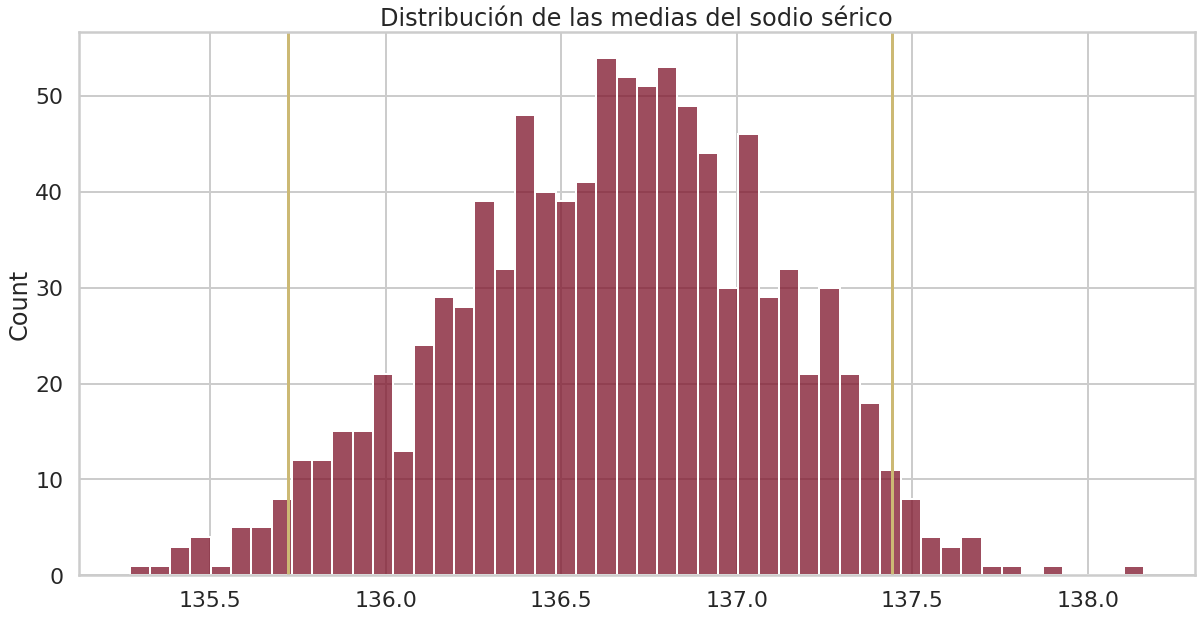

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.histplot(medias_series, color=colores[0], bins=50)
ax.set_title("Distribución de las medias del sodio sérico")
plt.axvline(li,c="y")
plt.axvline(ls,c="y")

#### Edad

In [ ]:
medias =[]

for i in range(1000):
  muestras = datosCorazon['age'].sample(n=100, replace=True)
  medias.append(muestras.mean())
medias_series = pd.Series(medias)

In [ ]:
print(f"Error estándar: {medias_series.std()}")
print(f"Valor mínimo: {medias_series.min()}")
print(f"Valor máximo: {medias_series.max()}")
print(f"Rango: {medias_series.max()-medias_series.min()}")
print(f"Curtosis: {medias_series.kurtosis()}")
print(f"Sesgo: {medias_series.skew()}")
li = medias_series.quantile(0.025)
ls = medias_series.quantile(0.975)
print(f"Intervalo de confianza al 95%: {li}<{medias_series.mean()}<{ls}")

Error estándar: 1.193673503058807
Valor mínimo: 57.22
Valor máximo: 64.43
Rango: 7.210000000000008
Curtosis: -0.06631885729454012
Sesgo: 0.043559377881221696
Intervalo de confianza al 95%: 58.488749999999996<60.84907885000001<63.260749999999994


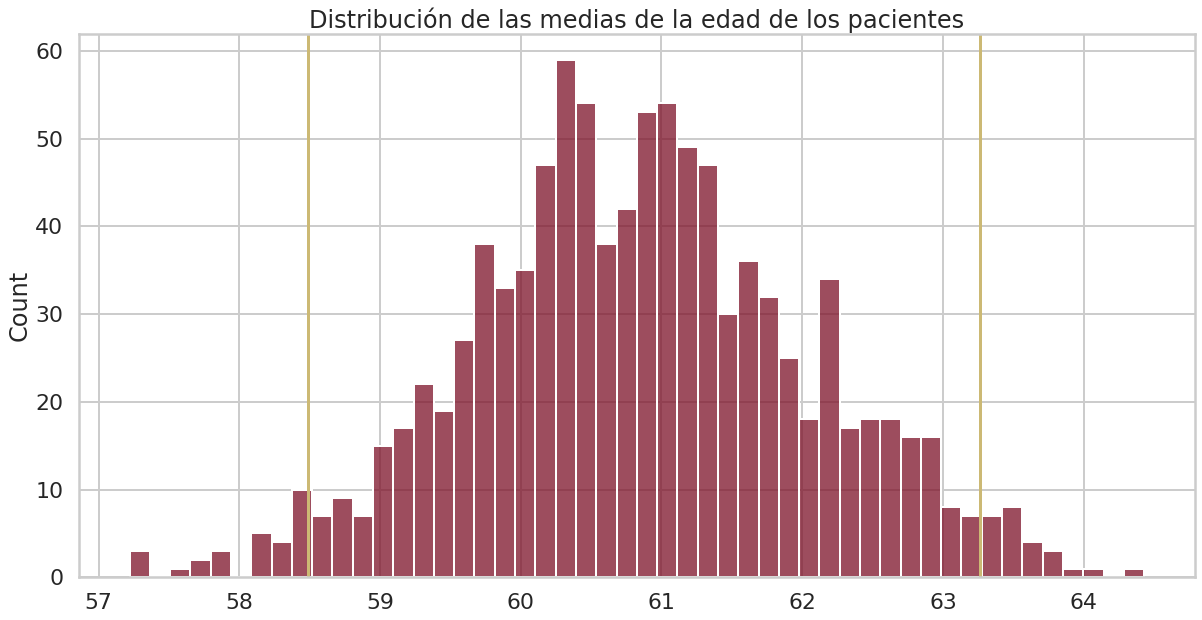

In [ ]:
sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
medias_series = pd.Series(medias)
ax = sns.histplot(medias_series, color=colores[0], bins=50)
ax.set_title("Distribución de las medias de la edad de los pacientes")
plt.axvline(li,c="y")
plt.axvline(ls,c="y")

De los bootstrap de las variables numéricas, se puede ver que la mayoría tienen un error estandar aproximado de 0, al igual que una curtosis y sesgo que tienden a cero, lo que implica que nuestros datos recolectados de la muestra sí pueden predecir la media poblacional.

## Regresió lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

En el mapa de calor se encontró que las variables con mayor correlación a un evento de muerte son el suero de creatinina y la fracción de eyección. Se decidió tratar de predecir los niveles de creatinina a partir de los niveles de sodio.

Score: 0.04


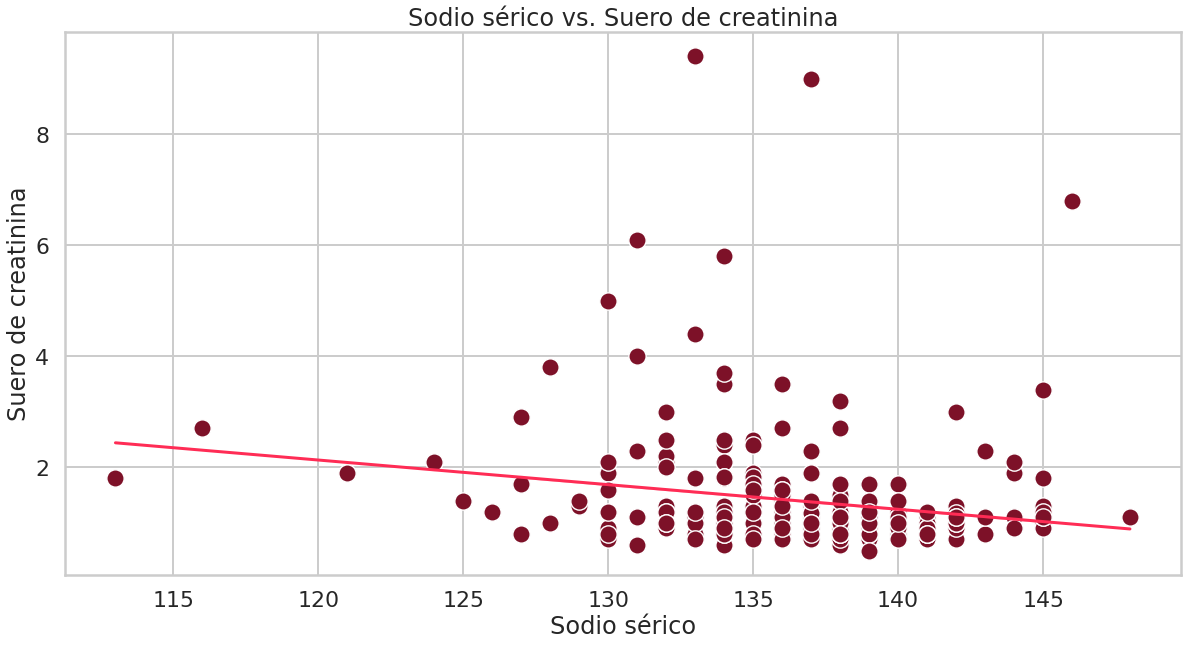

In [ ]:
LR.fit(datosCorazon['serum_sodium'].to_frame(),datosCorazon['serum_creatinine'])
y_predict2 = LR.predict(datosCorazon['serum_sodium'].to_frame())

sns.set(context ='poster', style="whitegrid")
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x=datosCorazon['serum_sodium'],y=datosCorazon['serum_creatinine'], color=colores[0], s=300)
sns.lineplot(x=datosCorazon['serum_sodium'],y=y_predict2, color=colores[1])
ax.set_title("Sodio sérico vs. Suero de creatinina")
plt.xlabel("Sodio sérico")
plt.ylabel("Suero de creatinina")
score=LR.score(datosCorazon['serum_sodium'].to_frame(),datosCorazon['serum_creatinine'])
print(f"Score: {score:0.2f}")

In [ ]:
# Coeficiente de determinación (r^2)
LR.score(datosCorazon['serum_sodium'].to_frame(),datosCorazon['serum_creatinine'])

0.03575699847942504

El coeficiente de determinación es mínimo, por lo que se concluye que no existe una correlación entre el sodio sérico y el suero de creatinina.

## Regresión lineal múltiple

Se realizó una regresión lineal múltiple para intentar predecir los niveles de sodio sérico de los pacientes a partir de la fracción de eyección, el suero de creatinina y la edad.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = datosCorazon[["ejection_fraction","serum_creatinine","age"]]
Y = datosCorazon["serum_sodium"]

In [ ]:
X_traning, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state=18)

In [ ]:
LR.fit(X_traning,Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LR.score(X_test, Y_test)

0.06718057435872371

Se obtuvo un *score* muy bajo, lo que significa que no se puede predecir el sodio sérico a partir de las variables seleccionadas.

Se quita la variable edad para intentar mejorar el modelo.

In [ ]:
X = datosCorazon[["ejection_fraction","serum_creatinine"]]
Y = datosCorazon["serum_sodium"]

In [ ]:
X_traning, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state=18)

In [ ]:
LR.fit(X_traning,Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

El modelo mejora marginalmente, por lo que se concluye que no se puede predecir el sodio sérico con las variables evaluadas.

In [ ]:
LR.score(X_test, Y_test)

0.07762219718554264

Los problemas que se encontraron con las regresiones lineales se deben a la baja correlación entre variables. Por suerte, el enfoque principal de este proyecto es resolver un problema de clasificación, el cual se solucionará con regresión lógística y *machine learning*.

## Procesamiento de Lenguaje Natural

Para esta sección se requiere un dataset con texto. Debido a la actualidad del tema, se escogió un dataset con tweets sobre el coronavirus. Cabe mencionar que los tweets están en inglés y se usan librerías para analizar términos en dicho idioma.

Se empezó importando las librerías necesarias y cargando el dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_tweets = pd.read_csv('/content/drive/MyDrive/Bedu Equipo 18/Análisis Exploratorio de Datos con Python /Corona_NLP_test.csv')
df_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Se tomaron únicamente los tweets y limpiamos los textos, eliminando caracteres que no sean letras, pasando a minúsculas, eliminando espacios al inicio y final de los tweets y eliminamos algún NA que se pueda encontrar entre los datos.

In [ ]:
tweets = df_tweets['OriginalTweet']
tweets.head()

0    TRENDING: New Yorkers encounter empty supermar...
1    When I couldn't find hand sanitizer at Fred Me...
2    Find out how you can protect yourself and love...
3    #Panic buying hits #NewYork City as anxious sh...
4    #toiletpaper #dunnypaper #coronavirus #coronav...
Name: OriginalTweet, dtype: object

In [ ]:
tweets = tweets.str.lower()
tweets = tweets.str.strip()
tweets = tweets.str.replace('[^\w\s]', '')
tweets = tweets.str.replace('\d', '')
tweets = tweets.str.replace('\\n', '')
tweets = tweets.dropna()

tweets

0       trending new yorkers encounter empty supermark...
1       when i couldnt find hand sanitizer at fred mey...
2       find out how you can protect yourself and love...
3       panic buying hits newyork city as anxious shop...
4       toiletpaper dunnypaper coronavirus coronavirus...
                              ...                        
3793    meanwhile in a supermarket in israel  people d...
3794    did you panic buy a lot of nonperishable items...
3795    asst prof of economics cconces was on nbcphila...
3796    gov need to do somethings instead of biar je r...
3797    i and forestandpaper members are committed to ...
Name: OriginalTweet, Length: 3798, dtype: object

Una vez limpios, se pueden *tokenizar* los tweets para crear un objeto Text y poder analizar todo el conjunto como un texto.

In [ ]:
tokenized = tweets.apply(nltk.word_tokenize)
tokenized

0       [trending, new, yorkers, encounter, empty, sup...
1       [when, i, couldnt, find, hand, sanitizer, at, ...
2       [find, out, how, you, can, protect, yourself, ...
3       [panic, buying, hits, newyork, city, as, anxio...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, pe...
3794    [did, you, panic, buy, a, lot, of, nonperishab...
3795    [asst, prof, of, economics, cconces, was, on, ...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, forestandpaper, members, are, committ...
Name: OriginalTweet, Length: 3798, dtype: object

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)
text

<Text: trending new yorkers encounter empty supermarket shelves pictured...>

Ahora se pueden eliminar palabras cortas típicas del inglés que no nos aportan realmente nada.

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
english_stop_words = stopwords.words('english')
valid_words = [word for word in all_words if word not in english_stop_words]

Se puede observar que palabras son las que más se repiten.

In [ ]:
text = nltk.Text(valid_words)
freq_dist_words = nltk.FreqDist(valid_words)

In [ ]:
freq_dist_words.most_common(10)

[('covid_', 1530),
 ('coronavirus', 1512),
 ('food', 1332),
 ('covid', 1287),
 ('store', 1008),
 ('grocery', 815),
 ('stock', 783),
 ('people', 774),
 ('amp', 578),
 ('shopping', 523)]

Como era de esperarse, entre las palabras más repetidas se encuentran aquellas que hacen referencia al coronavirus. Este es el tema de los tweets, para saber cuales son las palabras más comunes, aparte de éstas, se eliminaron y graficaron las 10 palabras más repetidas restantes.

In [ ]:
valid_words = [word for word in valid_words if word not in ['covid', 'covid_', 'coronavirus', 'amp']]

Text(0, 0.5, 'Conteo')

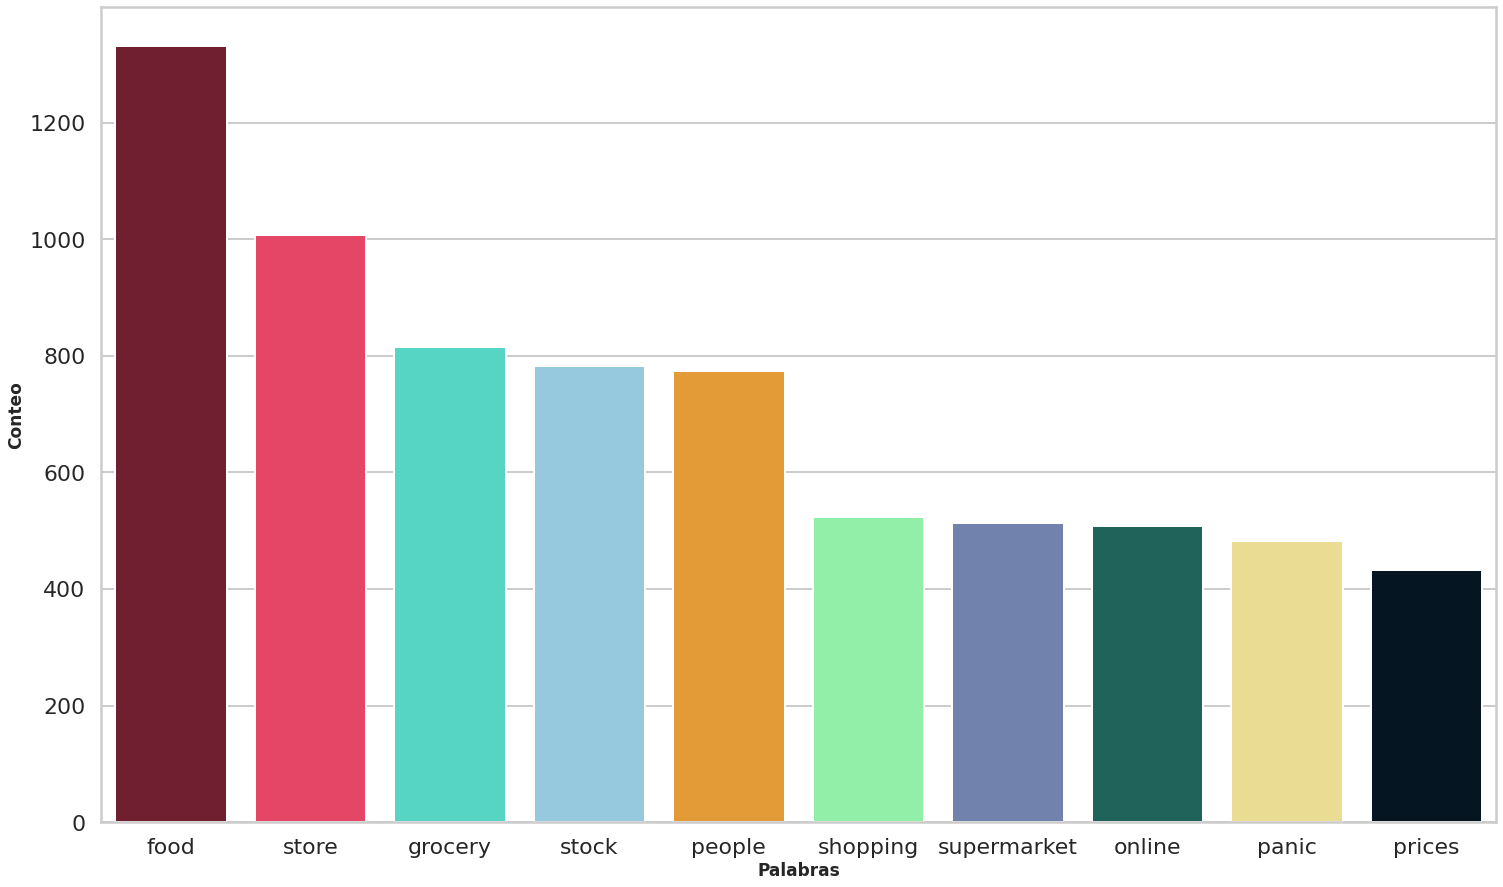

In [ ]:
sns.set(context ='poster', style="whitegrid")
freq_dist_words = nltk.FreqDist(valid_words)
common_10 = pd.DataFrame(freq_dist_words.most_common(10), columns=['words', 'count'])
plt.figure(figsize=(25, 15))
plt.rcParams.update({'font.size': 18})
sns.barplot(data = common_10, x = 'words', y = 'count', palette=customPalette)
plt.xlabel('Palabras', fontsize=17, weight='bold')
plt.ylabel('Conteo', fontsize=17, weight='bold')
# plt.savefig('words_frequency.png', bbox_inches='tight', dpi=300) # Guardar la gráfica como png

Se puede observar que muchas hacen referencia a las compras y a la despensa, lo cual es lógico, ya que la pandemia obligó a los países a entrar en cuarentena, volviendo la obtención de la despensa básica una de las mayores preocupaciones de las familias.

Ahora se observa que arroja los bigramas más comunes.

Text(0, 0.5, 'Bigramas')

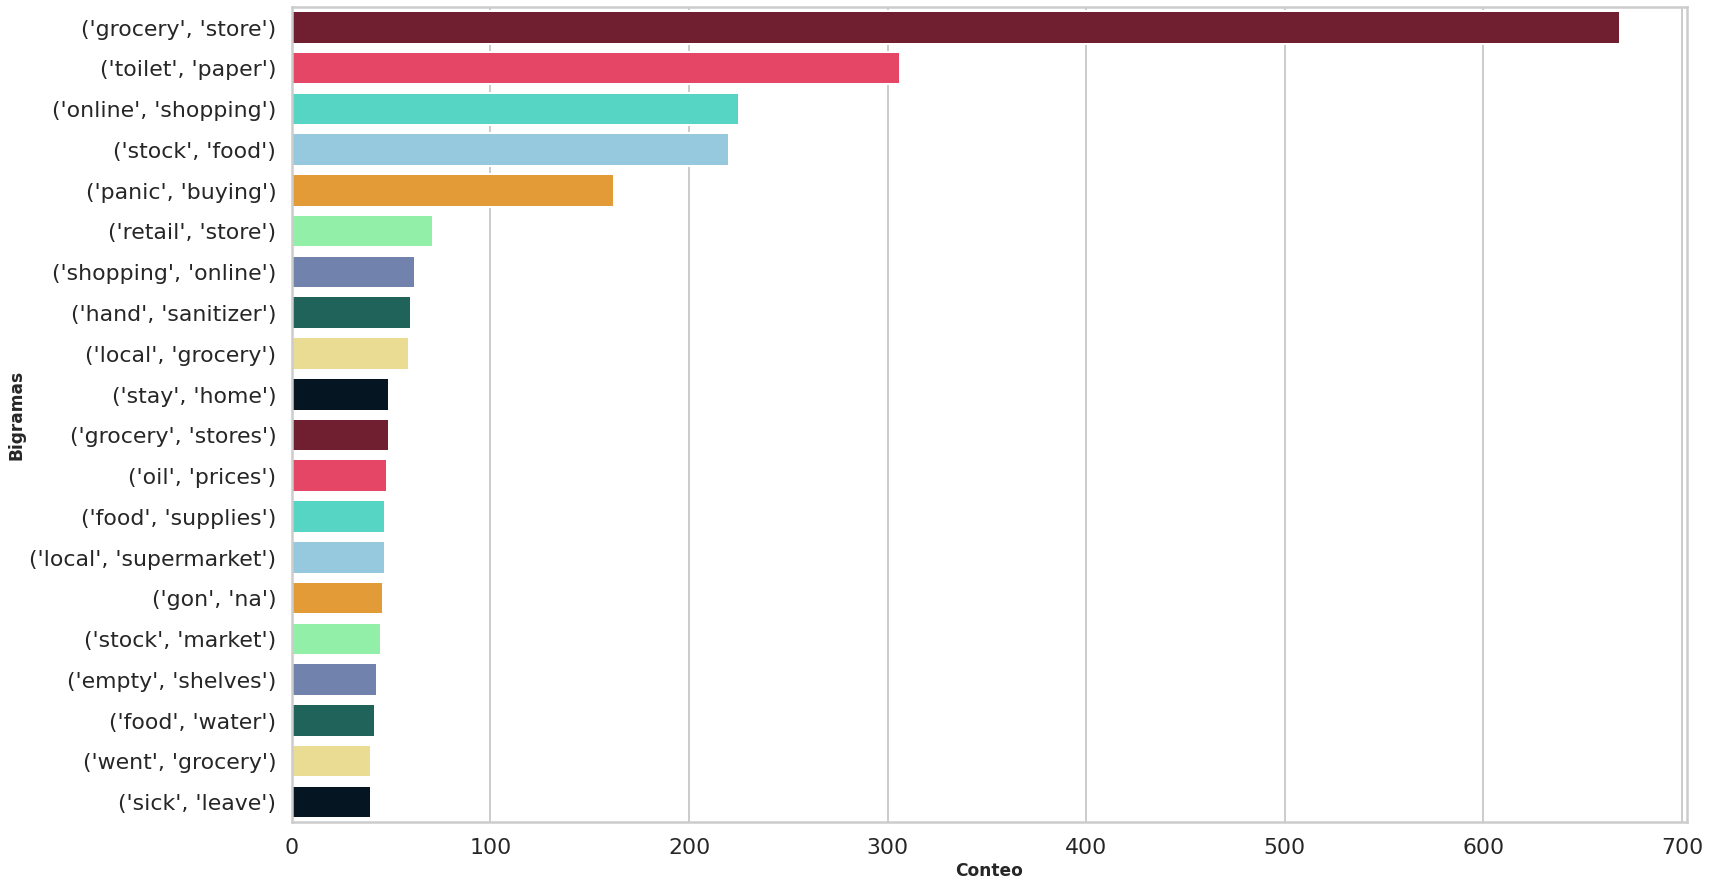

In [ ]:
sns.set(context ='poster', style="whitegrid")
text = nltk.Text(valid_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))
common_20 = pd.DataFrame(freq_dist_bigrams.most_common(20), columns=['words', 'count'])
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(25, 15))
sns.barplot(data = common_20, x = "count", y = "words", palette=customPalette)
plt.xlabel('Conteo', fontsize=17, weight='bold')
plt.ylabel('Bigramas', fontsize=17, weight='bold')
# plt.savefig('bigrams_frequency.png', bbox_inches='tight', dpi=300) # Guardar la gráfica como png

Se sigue notando que las tiendas y mercados son los conceptos más mencionados. También tenemos frases muy repetidas durante esta pandemia como "papel de baño", "sanitizante de manos" y "quédate en casa".

Finalmente, con una nube de palabras, se puede distinguir visualmente como unos términos son mucho más comunes que otros.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from PIL import Image
def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)
    mask = np.array(image)
    
    return mask
mask=transform_white_backgroud("/content/drive/MyDrive/Bedu Equipo 18/Análisis Exploratorio de Datos con Python /1586348910virus.png")   
image_colors = ImageColorGenerator(mask)

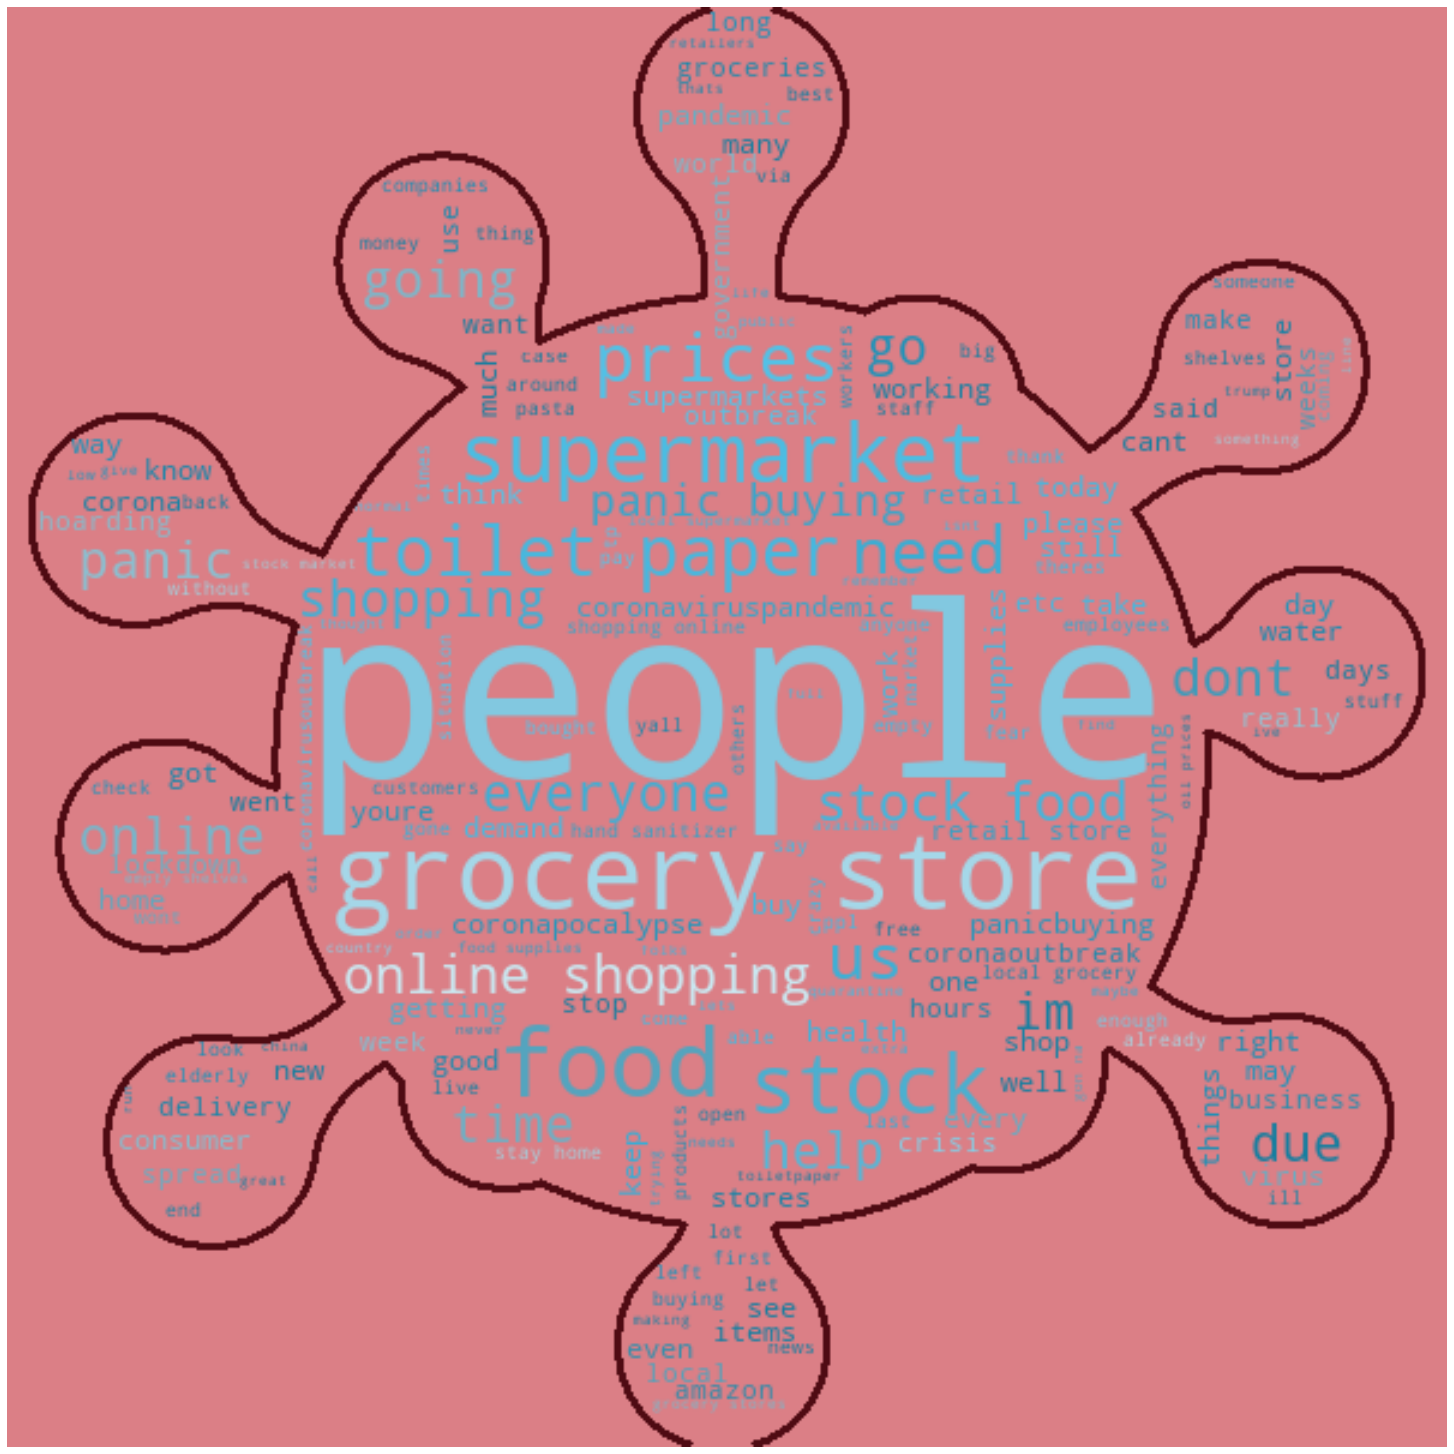

In [ ]:
wordcloud = WordCloud(mask=mask,max_font_size = 100, background_color = '#db7f86', width=1600, height=1600,normalize_plurals=False, contour_color='#4f0b13', contour_width=2).generate(' '.join(valid_words))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear") # Interpolation para que las imágenes no se ven con mala definición
plt.axis('off')
plt.savefig('word_cloud.png', bbox_inches='tight', dpi=300) # Guardar la gráfica como png
plt.tight_layout(pad=0)
plt.show()

## Regresión Lógistica y *machine learning*

In [ ]:
pip install scikit-plot

In [ ]:
# Bibliotecas para realizar regresión logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

# Visualización de datos
import scikitplot as skplt
plt.style.use('seaborn-darkgrid')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16

In [ ]:
datosCorazon.duplicated().sum() #no hay ningún registro duplicado de pacientes

0

###**¿Nuestra base de datos está balanceada?**

In [ ]:
len(datosCorazon[datosCorazon['DEATH_EVENT']==1])

96

In [ ]:
len(datosCorazon[datosCorazon['DEATH_EVENT']==0])

203

In [ ]:
perc_muertos = len(datosCorazon[datosCorazon['DEATH_EVENT']==1])/len(datosCorazon)*100
print('Porcentaje de numero de personas muertas','%1.2f %%'  % perc_muertos)

Porcentaje de numero de personas muertas 32.11 %


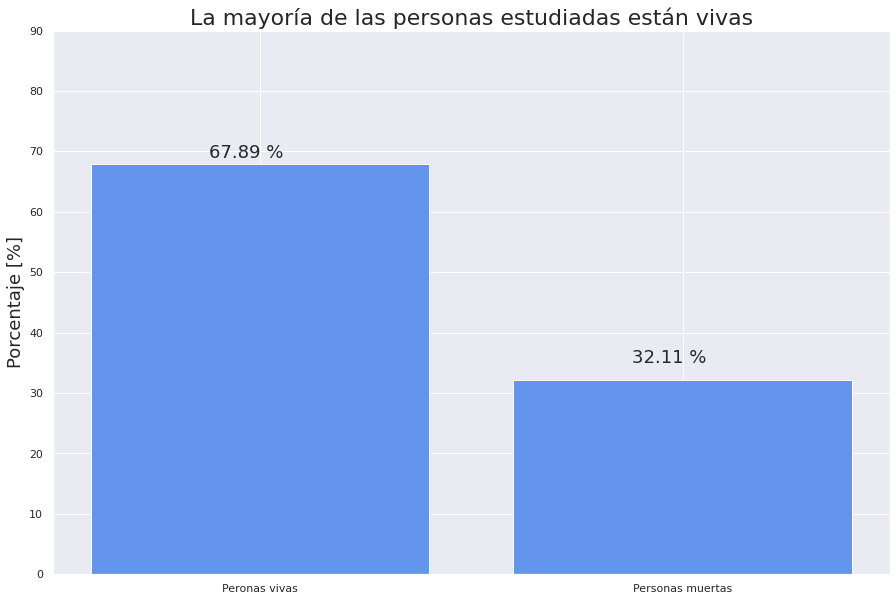

In [ ]:
perc_vivos = 100-perc_muertos
plt.figure(figsize=(15,10))
plt.bar(['Peronas vivas', 'Personas muertas'], [perc_vivos, perc_muertos], color = 'cornflowerblue')
plt.title('La mayoría de las personas estudiadas están vivas', fontsize = 22)
plt.ylabel('Porcentaje [%]', fontsize = 18)
plt.ylim(0, 90)
plt.text(-0.12,69,'67.89 %', fontsize=18)
plt.text(0.88,35,'32.11 %', fontsize=18);

Esto puede representar un problema para nuestro modelo, ya que puede predecir mejor a las personas sobrevivientes que a las no sobreviven. Si queremos predecir a las personas que mueren, tal vez se tengan que balancear los datos.

In [ ]:
#Sólo basándose en características con una cantidad alta de correlación 
x_features=['time','ejection_fraction','serum_creatinine']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datosCorazon[x_features], datosCorazon['DEATH_EVENT'], test_size=0.2, random_state=69)

In [ ]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [ ]:
# Entrenamiento del modelo 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Haciendo las predicciones
y_hat = model.predict(x_test)

# Se ven las primeras 10 predicciones (sólo para comprobar que se tienen únicamentete valores de 0 y 1)
y_hat[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.72      0.65      0.68        20

    accuracy                           0.80        60
   macro avg       0.78      0.76      0.77        60
weighted avg       0.80      0.80      0.80        60



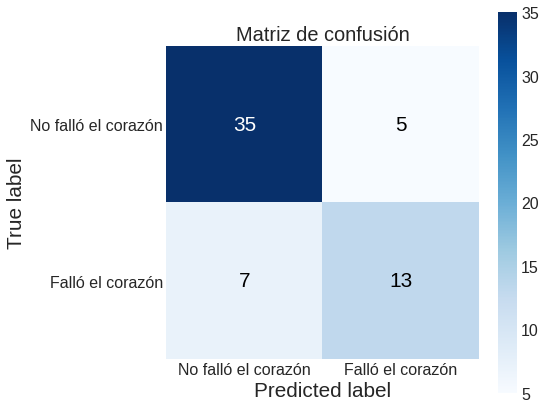

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = False, figsize=(7,7),text_fontsize='xx-large')
plt.title('Matriz de confusión' , fontsize = 20);
plt.xticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16)
plt.yticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16);

De la matriz de confusión se puede observar que sí se predijo a más personas sobrevivientes que muertas, además nuestro modelo predice más falsos negativos (implica que nuestro modelo predijo que la persona estaba muerta, cuando está viva) y pocos falsos positivos (implica que nuestro modelo colocó a personas vivas, cuando estaban muertas). Como tenemos pocas personas con falsos positivos, el modelo hizo relativamente bien.

In [ ]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat))

Área bajo la curva ROC:  0.762


De la evaluación del modelo con la curva ROC se puede decir que el modelo no lo hizo perfecto, pero lo hizo bien, mayor a 0.5.

## Conclusiones

Gracias a la distribución de los datos, la correlación de Pearson  y el empleo del modelo de regresión logística se pudo predecir si los pacientes corría riesgo de una enfermedad cardiovascular, a partir de tres características, la fracción de eyección, los niveles de suero de creatinina y tiempo de segumiento. Se considera de gran importancia monitorear estos tres parametros en personas con riesgo de tener algún problema cardiovascular mortal.
